<a href="https://colab.research.google.com/github/mhmdghazal/Keras-Example/blob/master/Image_classification_with_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np

## Load the MobileNetV2 model from keras applications folder

In [0]:
from keras.applications import MobileNetV2
mobilenet_model = MobileNetV2(weights='imagenet', include_top=True)
from keras.applications.mobilenetv2 import preprocess_input, decode_predictions


## Import the required image preprocessing functions

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
filename = '/content/cat3.jpg'

## Perform Pre-processing before feeding the image to the network

#### We perform the following pre-processing to the image

1. Keras loads the image using PIL library. This is done using the **load_img** function. The image is in width x height x channels format.
2. Convert the image from PIL format to Numpy format ( height x width x channels ) using **image_to_array** function.
3. Form a batch of image( s ) to feed the network. This is done using the **expand_dims** function in Numpy

('PIL image size', (224, 224))


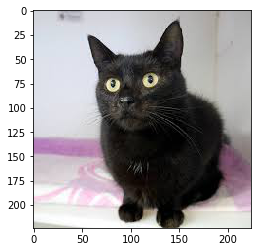

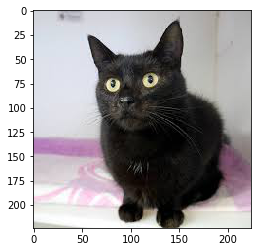

('numpy array size', (224, 224, 3))
('image batch size', (1, 224, 224, 3))


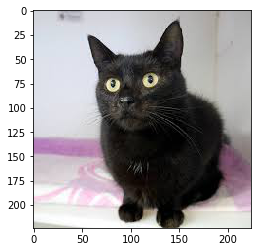

In [69]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## Predictions using the various Network

1. Preprocess the input by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet
2. get the probabilities of occurrence for each class
3. convert the probabilities to human-readable labels

### MobileNet Network

(-0.5, 699.5, 699.5, -0.5)

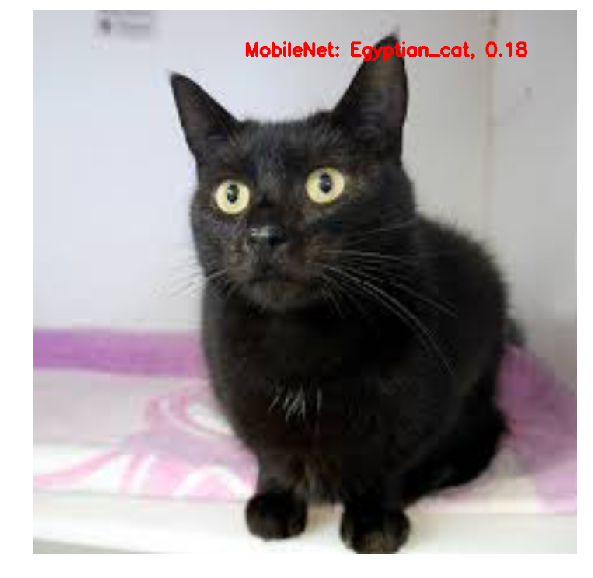

In [70]:
# prepare the image for the MobileNet model
processed_image = preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)


# convert the probabilities to imagenet class labels
label_MobileNet = decode_predictions(predictions)
label_MobileNet


import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))


cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_MobileNet[0][0][1], label_MobileNet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')